# Coverage / Executions

## objdump

In [153]:
exec_name = 'objdump'
dffinal = pd.DataFrame()

In [154]:
for trial in ['1','2','3']:
    resultpath = os.path.join(resultspath + exec_name, exec_name + '_afl' + str(trial))
    df = pd.read_csv(resultpath)
    df_helper = pd.DataFrame(np.array(range(df['# unix_time'][0], df['# unix_time'][len(df)-1]+1)))
    df_helper = df_helper.merge(df[['# unix_time', ' execs_per_sec', ' paths_total']], left_on=0, right_on='# unix_time', how='left', left_index=True)
    df_helper.set_index(0, inplace=True)
    del df_helper['# unix_time']
    df_helper[' execs_per_sec'].ffill(inplace=True)
    df_helper['running_exec_sum'] = df_helper[' execs_per_sec'].cumsum()
    df_helper = df_helper[[' paths_total', 'running_exec_sum']]
    
    df_helper['running_exec_sum'] = pd.to_datetime(df_helper['running_exec_sum'], unit='s', origin='unix')
    df = df_helper.set_index('running_exec_sum').resample('100000s').mean().reset_index()
    df['running_exec_sum'] = df.running_exec_sum.astype(int) / 10**9
    df = df.rename(columns={' paths_total': 'cur_path'})
    df['cur_path'] =df['cur_path'].ffill()
    #df = df.rename(columns={' paths_total': 'cur_path'})
    #del df['running_exec_sum']
    df['event'] = 'AFL'
    dffinal = dffinal.append(df)

In [155]:
# curious
for trial in ['', '1']:
    resultpath = os.path.join(resultspath + exec_name, exec_name + '_curious' + str(trial))
    df = pd.read_csv(resultpath)
    df_helper = pd.DataFrame(np.array(range(df['# unix_time'][0], df['# unix_time'][len(df)-1]+1)))
    df_helper = df_helper.merge(df[['# unix_time', ' execs_per_sec', ' paths_total']], left_on=0, right_on='# unix_time', how='left', left_index=True)
    df_helper.set_index(0, inplace=True)
    del df_helper['# unix_time']
    df_helper[' execs_per_sec'].ffill(inplace=True)
    df_helper['running_exec_sum'] = df_helper[' execs_per_sec'].cumsum()
    df_helper = df_helper[[' paths_total', 'running_exec_sum']]

    df_helper['running_exec_sum'] = pd.to_datetime(df_helper['running_exec_sum'], unit='s', origin='unix')
    df = df_helper.set_index('running_exec_sum').resample('100000s').mean().reset_index()
    df['running_exec_sum'] = df.running_exec_sum.astype(int) / 10**9
    df = df.rename(columns={' paths_total': 'cur_path'})
    df['cur_path'] =df['cur_path'].ffill()
    df['event'] = 'CuriousAFL'
    dffinal = dffinal.append(df)


In [156]:
p = utest(dffinal, x_var='running_exec_sum')

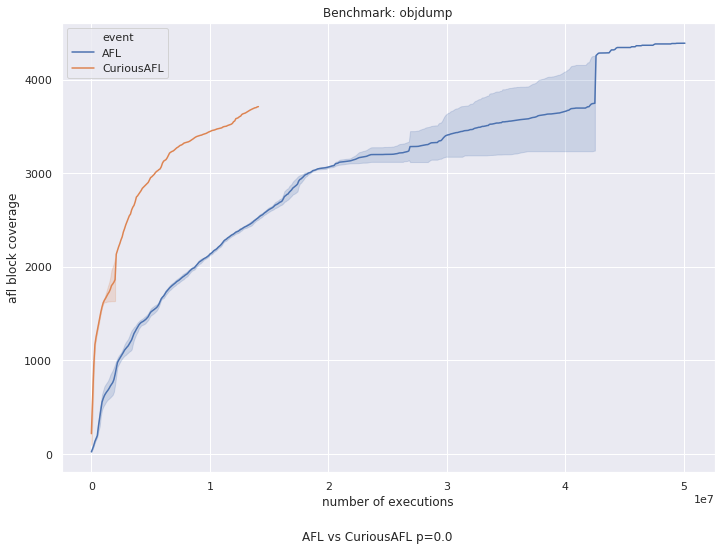

In [157]:
ax = sns.lineplot(x="running_exec_sum", y="cur_path", hue='event', ci=60, data=dffinal)
ax.set(xlabel='number of executions', ylabel='afl block coverage')

plt.legend()
plt.title('Benchmark: ' + exec_name)
plt.figtext(0.5, 0.01, "AFL vs CuriousAFL p=" + str(p), wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig('./'+exec_name+'24h_covtime.png', dpi = 200)

## nm

In [163]:
exec_name = 'nm'
dffinal = pd.DataFrame()

In [164]:
for trial in ['1','2','3']:
    resultpath = os.path.join(resultspath + exec_name, exec_name + '_afl' + str(trial))
    df = pd.read_csv(resultpath)
    df_helper = pd.DataFrame(np.array(range(df['# unix_time'][0], df['# unix_time'][len(df)-1]+1)))
    df_helper = df_helper.merge(df[['# unix_time', ' execs_per_sec', ' paths_total']], left_on=0, right_on='# unix_time', how='left', left_index=True)
    df_helper.set_index(0, inplace=True)
    del df_helper['# unix_time']
    df_helper[' execs_per_sec'].ffill(inplace=True)
    df_helper['running_exec_sum'] = df_helper[' execs_per_sec'].cumsum()
    df_helper = df_helper[[' paths_total', 'running_exec_sum']]
    
    df_helper['running_exec_sum'] = pd.to_datetime(df_helper['running_exec_sum'], unit='s', origin='unix')
    df = df_helper.set_index('running_exec_sum').resample('100000s').mean().reset_index()
    df['running_exec_sum'] = df.running_exec_sum.astype(int) / 10**9
    df = df.rename(columns={' paths_total': 'cur_path'})
    df['cur_path'] =df['cur_path'].ffill()
    #df = df.rename(columns={' paths_total': 'cur_path'})
    #del df['running_exec_sum']
    df['event'] = 'AFL'
    dffinal = dffinal.append(df)

In [165]:
# curious
resultpath = os.path.join(resultspath + exec_name, exec_name + '_curious2')
df = pd.read_csv(resultpath)
df_helper = pd.DataFrame(np.array(range(df['# unix_time'][0], df['# unix_time'][len(df)-1]+1)))
df_helper = df_helper.merge(df[['# unix_time', ' execs_per_sec', ' paths_total']], left_on=0, right_on='# unix_time', how='left', left_index=True)
df_helper.set_index(0, inplace=True)
del df_helper['# unix_time']
df_helper[' execs_per_sec'].ffill(inplace=True)
df_helper['running_exec_sum'] = df_helper[' execs_per_sec'].cumsum()
df_helper = df_helper[[' paths_total', 'running_exec_sum']]

df_helper['running_exec_sum'] = pd.to_datetime(df_helper['running_exec_sum'], unit='s', origin='unix')
df = df_helper.set_index('running_exec_sum').resample('100000s').mean().reset_index()
df['running_exec_sum'] = df.running_exec_sum.astype(int) / 10**9
df = df.rename(columns={' paths_total': 'cur_path'})
df['cur_path'] =df['cur_path'].ffill()
df['event'] = 'CuriousAFL'
dffinal = dffinal.append(df)


In [166]:
p = utest(dffinal, x_var='running_exec_sum')

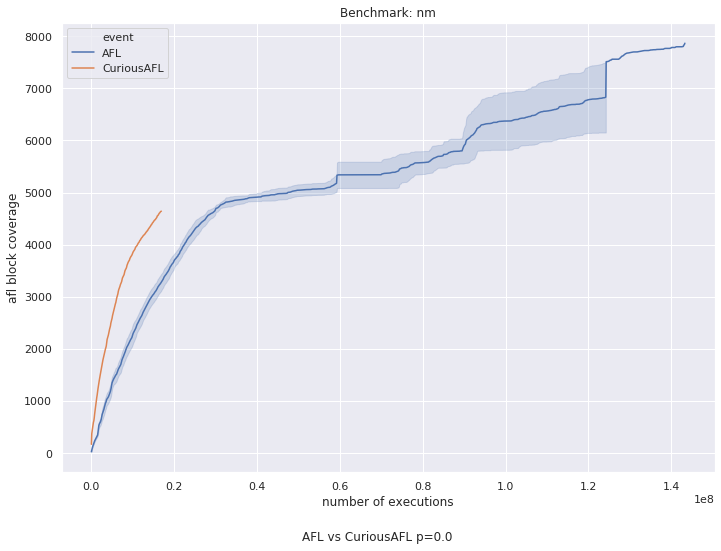

In [167]:
ax = sns.lineplot(x="running_exec_sum", y="cur_path", hue='event', ci=60, data=dffinal)
ax.set(xlabel='number of executions', ylabel='afl block coverage')

plt.legend()
plt.title('Benchmark: ' + exec_name)
plt.figtext(0.5, 0.01, "AFL vs CuriousAFL p=" + str(p), wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig('./'+exec_name+'24h_covtime.png', dpi = 200)